## Solutions

### Exercise 1

For a cum-dividend asset, the basic risk-neutral asset pricing equation is

$$
p_t = d_t + \beta {\mathbb E}_t [ p_{t+1} ]
$$


<a id='mass-ex1'></a>
With constant dividends, the equilibrium price is

$$
p_t = \frac{1}{1-\beta} d_t
$$

With a growing, non-random dividend process, the equilibrium price is

$$
p_t = \frac{1}{1 - \beta g} d_t
$$

### Exercise 2

First let’s enter the parameters:

In [10]:
n = 5
P = 0.0125 * np.ones((n, n))
P += np.diag(0.95 - 0.0125 * np.ones(5))
s = np.array([0.95, 0.975, 1.0, 1.025, 1.05])  # state values
mc = qe.MarkovChain(P, state_values=s)

γ = 2.0
β = 0.94
ζ = 1.0
p_s = 150.0

Next we’ll create an instance of `AssetPriceModel` to feed into the
functions

In [11]:
apm = AssetPriceModel(β=β, mc=mc, γ=γ, g=lambda x: x)

Now we just need to call the relevant functions on the data:

In [12]:
tree_price(apm)

array([29.47401578, 21.93570661, 17.57142236, 14.72515002, 12.72221763])

In [13]:
consol_price(apm, ζ)

array([753.87100476, 242.55144082, 148.67554548, 109.25108965,
        87.56860139])

In [14]:
call_option(apm, ζ, p_s)

array([603.87100476, 176.8393343 , 108.67734499,  80.05179254,
        64.30843748])

Let’s show the last two functions as a plot

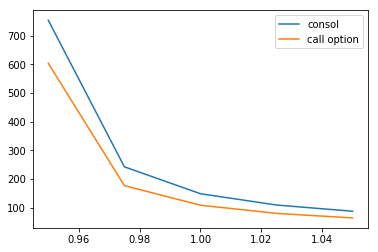

In [15]:
fig, ax = plt.subplots()
ax.plot(s, consol_price(apm, ζ), label='consol')
ax.plot(s, call_option(apm, ζ, p_s), label='call option')
ax.legend()
plt.show()

### Exercise 3

Here’s a suitable function:

In [16]:
def finite_horizon_call_option(ap, ζ, p_s, k):
    """
    Computes k period option value.
    """
    # == Simplify names, set up matrices  == #
    β, γ, P, y = ap.β, ap.γ, ap.mc.P, ap.mc.state_values
    M = P * ap.g(y)**(- γ)

    # == Make sure that a unique solution exists == #
    ap.test_stability(M)


    # == Compute option price == #
    p = consol_price(ap, ζ)
    w = np.zeros(ap.n)
    for i in range(k):
        # == Maximize across columns == #
        w = np.maximum(β * M @ w, p - p_s)

    return w

Now let’s compute the option values at `k=5` and `k=25`

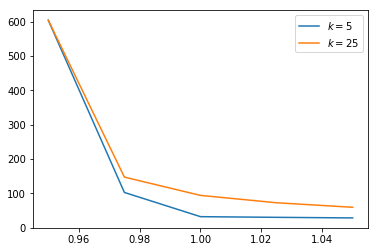

In [17]:
fig, ax = plt.subplots()
for k in [5, 25]:
    w = finite_horizon_call_option(apm, ζ, p_s, k)
    ax.plot(s, w, label=rf'$k = {k}$')
ax.legend()
plt.show()

Not surprisingly, the option has greater value with larger $ k $

This is because the owner has a longer time horizon over which he or she
may exercise the option